In [14]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

'baseline value' FHR baseline (beats per minute)
'accelerations' Number of accelerations per second
'fetal_movement' Number of fetal movements per second
'uterine_contractions' Number of uterine contractions per second
'light_decelerations' Number of light decelerations per second
'severe_decelerations' Number of severe decelerations per second
'prolongued_decelerations' Number of prolonged decelerations per second
'abnormal_short_term_variability' Percentage of time with abnormal short term variability
'mean_value_of_short_term_variability' Mean value of short term variability
'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
'mean_value_of_long_term_variability' Mean value of long term variability
'histogram_width' Width of FHR histogram
'histogram_min' Minimum (low frequency) of FHR histogram
'histogram_max' Maximum (high frequency) of FHR histogram
'histogram_number_of_peaks' Number of histogram peaks
'histogram_number_of_zeroes' Number of histogram zeros
'histogram_mode' Histogram mode
'histogram_mean' Histogram mean
'histogram_median' Histogram median
'histogram_variance' Histogram variance
'histogram_tendency' Histogram tendency

Target

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)



In [15]:
df = pd.read_csv("../data/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [16]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [17]:
# Check missing value
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [18]:
df.info() 
# Total have 2126 rows, 22 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [20]:
# Find out how many of each class there
df["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

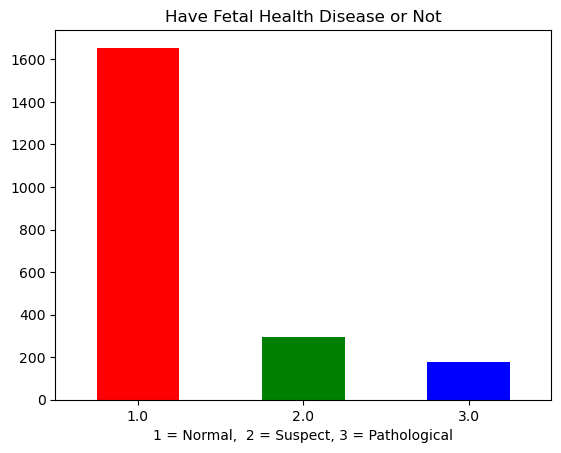

In [21]:
# Find out how many of each class there
df["fetal_health"].value_counts().plot(kind="bar", color=["red", "green", "blue"])
plt.title("Have Fetal Health Disease or Not")
plt.xlabel("1 = Normal,  2 = Suspect, 3 = Pathological" )
plt.xticks(rotation=0);

(22.5, -0.5)

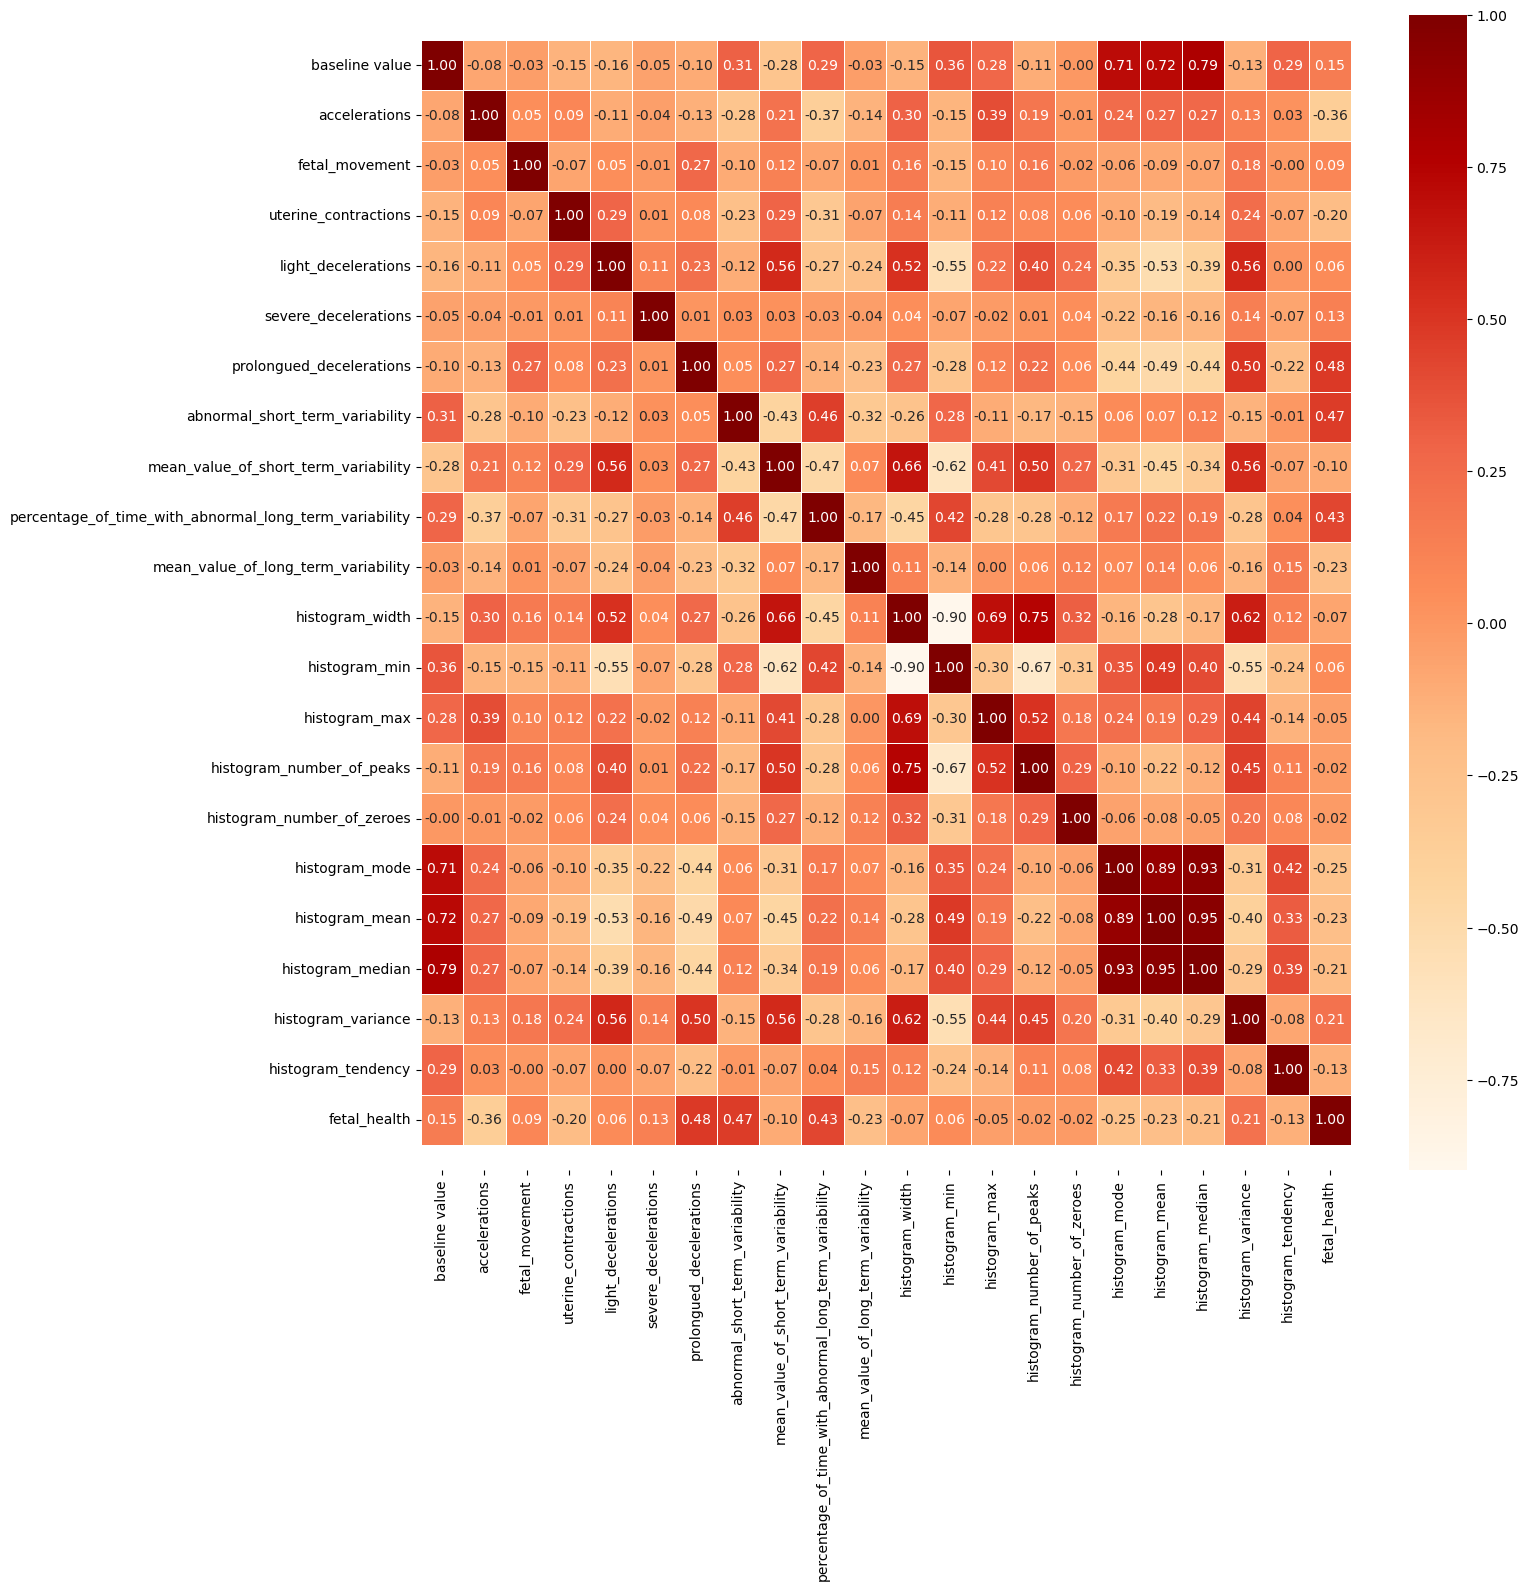

In [22]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="OrRd");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [23]:
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

In [24]:
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=42)

Text(0.5, 1.0, 'Test Class distribution')

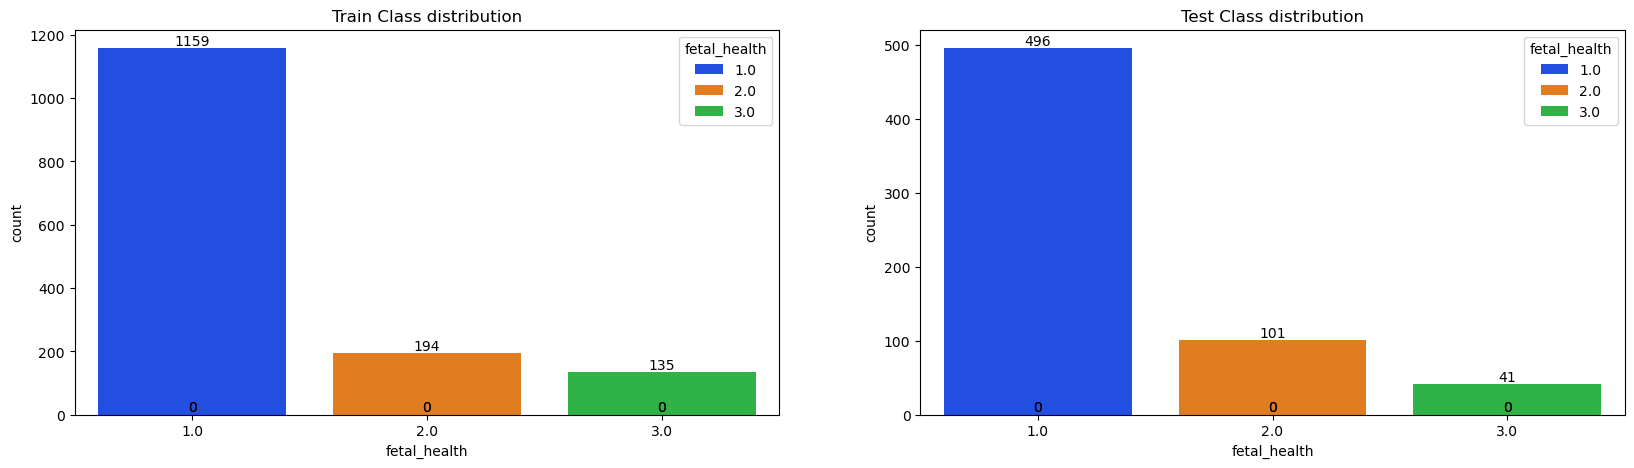

In [25]:
df_train=X_train.copy()
df_train['fetal_health']=y_train
df_test=X_test.copy()
df_test['fetal_health']=y_test

fig,ax=plt.subplots(1,2,figsize=(20,5))
g1=sns.countplot(data=df_train,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[0],dodge=False)
g1.bar_label(g1.containers[0]);
g1.bar_label(g1.containers[1]);
g1.bar_label(g1.containers[2]);
ax[0].set_title('Train Class distribution')

g2=sns.countplot(data=df_test,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[1],dodge=False)
g2.bar_label(g2.containers[0]);
g2.bar_label(g2.containers[1]);
g2.bar_label(g2.containers[2]);
ax[1].set_title('Test Class distribution')

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# The data seems unbalanced. I use a SMOTE resampling technique
sm=SMOTE(random_state=42)

#da ora in avanti si userà la lettera s per indicare dati bilanciato con SMOTE
X_train,y_train=sm.fit_resample(X_train,y_train)

In [27]:
scaler=StandardScaler()

# Balance and scale data 
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

# From now on the word "only" will be used to indicate data balanced with SMOTE
X_train_onlyscaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_onlyscaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

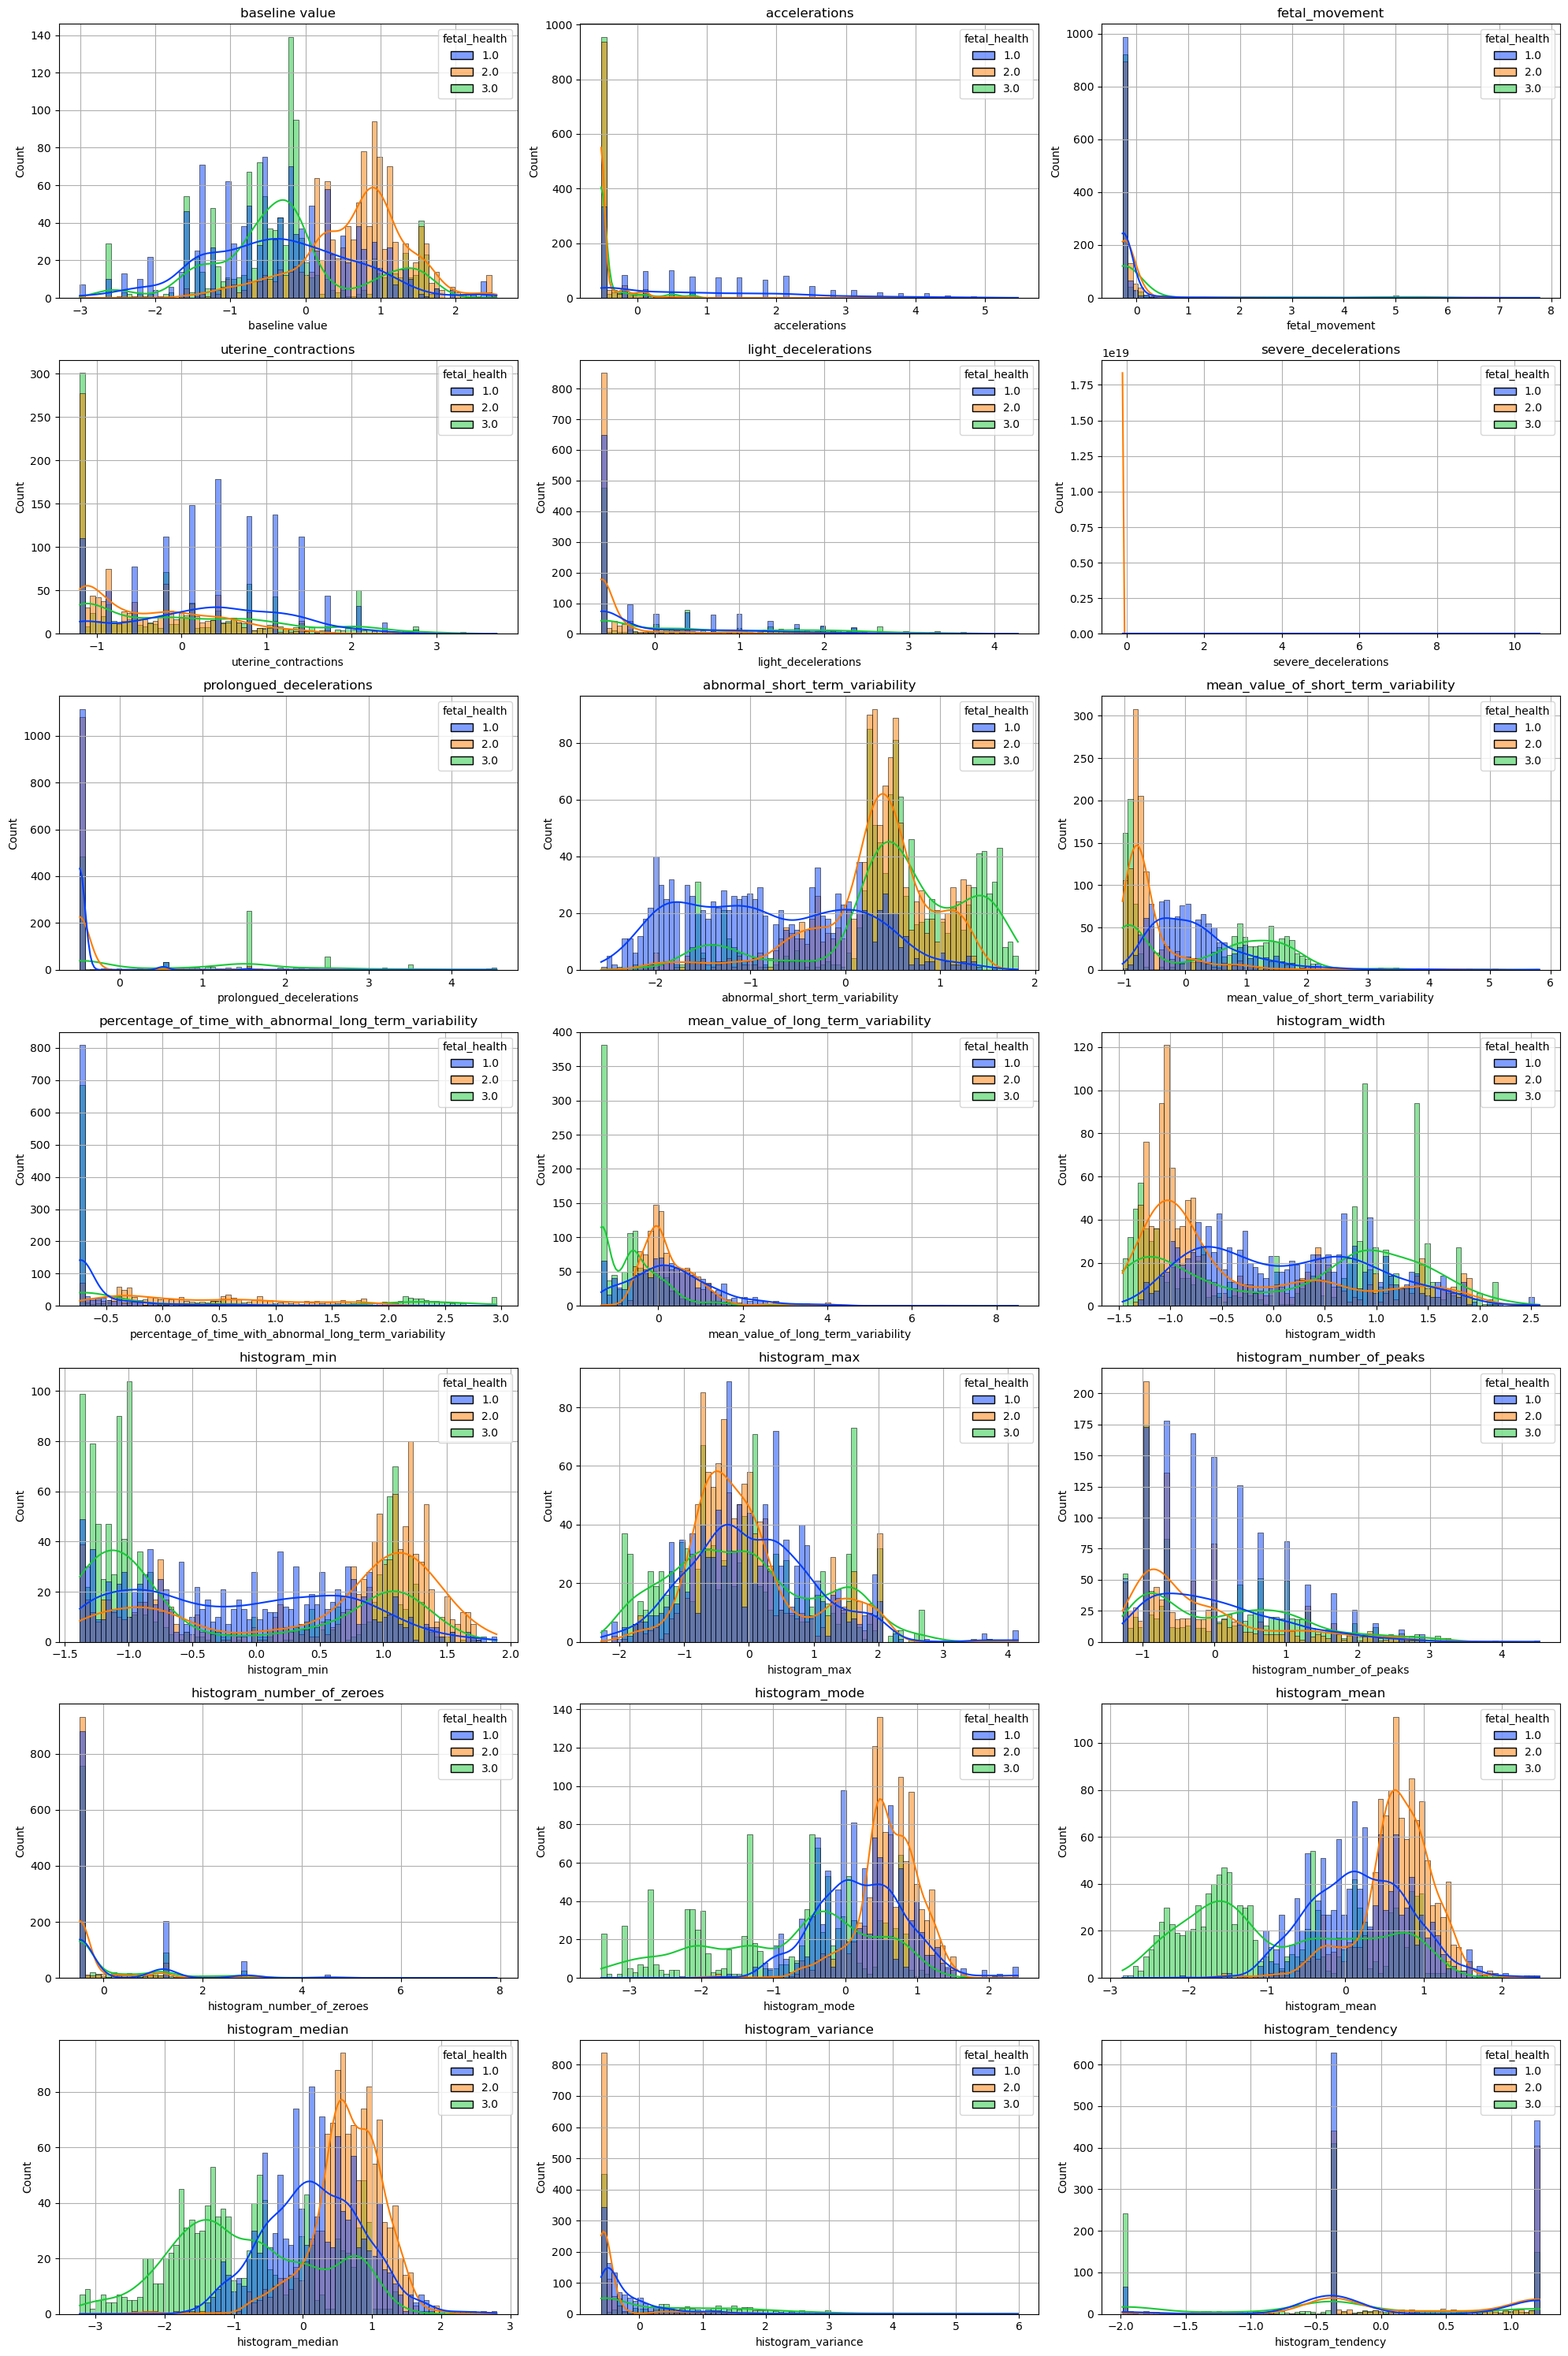

In [28]:
dfs=X_train_scaled.copy()
dfs['fetal_health']=y_train
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(X.columns):#.drop(['histogram_min','histogram_mode','histogram_median'])):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()

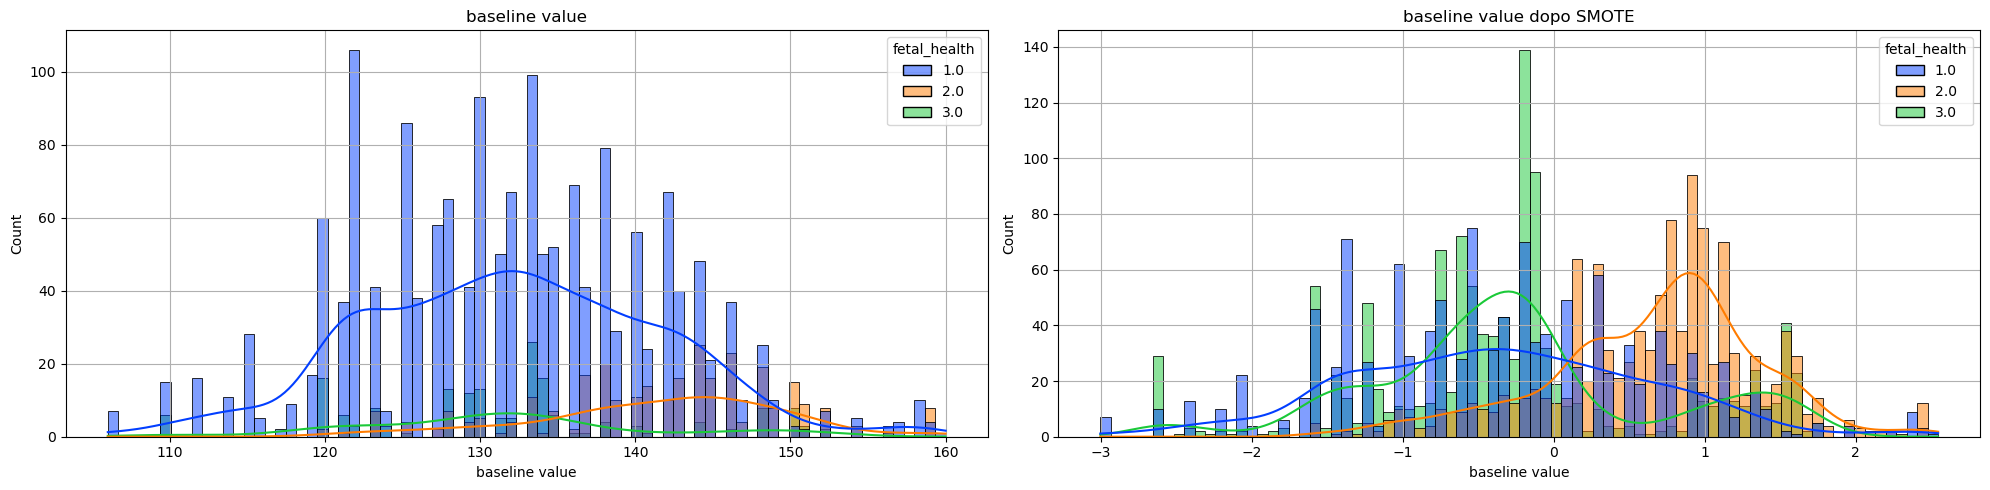

In [29]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax=ax.ravel()
sns.histplot(df,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[0],palette='bright')
ax[0].set_title('baseline value')
ax[0].grid()
sns.histplot(dfs,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[1],palette='bright')
ax[1].set_title('baseline value dopo SMOTE')
ax[1].grid()

plt.tight_layout()

In [30]:
#Create a conditional statement to visualize data for each model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True):
    if train:
        pred = clf.predict(X_train_onlyscaled)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_onlyscaled)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

1. Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_onlyscaled, y_train)

print_score(lr_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(lr_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 88.04%
_______________________________________________
CLASSIFICATION REPORT:
                   1.0          2.0          3.0  accuracy    macro avg  \
precision     0.946197     0.819835     0.882254  0.880357     0.882762   
recall        0.880069     0.855910     0.905091  0.880357     0.880357   
f1-score      0.911936     0.837484     0.893526  0.880357     0.880982   
support    1159.000000  1159.000000  1159.000000  0.880357  3477.000000   

           weighted avg  
precision      0.882762  
recall         0.880357  
f1-score       0.880982  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1020  115   24]
 [  51  992  116]
 [   7  103 1049]]

Test Result:
Accuracy Score: 82.45%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.978774    0.517007   0.522388  0.824451    0.672723   
recall       0.

In [32]:
#Create a dataframe to plot training and testing accuracy for each model for comparison
test_score = accuracy_score(y_test, lr_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train_onlyscaled)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.035663,82.445141


2. K-Nearest Neighbors Claasifer

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_onlyscaled, y_train)

print_score(knn_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(knn_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 97.12%
_______________________________________________
CLASSIFICATION REPORT:
                   1.0          2.0          3.0  accuracy    macro avg  \
precision     0.998133     0.927595     0.993121   0.97124     0.972949   
recall        0.922347     0.994823     0.996549   0.97124     0.971240   
f1-score      0.958744     0.960033     0.994832   0.97124     0.971203   
support    1159.000000  1159.000000  1159.000000   0.97124  3477.000000   

           weighted avg  
precision      0.972949  
recall         0.971240  
f1-score       0.971203  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1069   86    4]
 [   2 1153    4]
 [   0    4 1155]]

Test Result:
Accuracy Score: 85.58%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.977117    0.557047   0.692308  0.855799    0.742157   
recall       0.

In [34]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.035663,82.445141
1,K-nearest neighbors,97.123957,85.579937


3. Suport Vector Machine

In [35]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train_onlyscaled, y_train)

print_score(svm_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(svm_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 97.01%
_______________________________________________
CLASSIFICATION REPORT:
                   1.0          2.0          3.0  accuracy    macro avg  \
precision     1.000000     0.924559     0.991334  0.970089     0.971964   
recall        0.929249     0.993960     0.987058  0.970089     0.970089   
f1-score      0.963327     0.958004     0.989192  0.970089     0.970174   
support    1159.000000  1159.000000  1159.000000  0.970089  3477.000000   

           weighted avg  
precision      0.971964  
recall         0.970089  
f1-score       0.970174  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1077   79    3]
 [   0 1152    7]
 [   0   15 1144]]

Test Result:
Accuracy Score: 88.24%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.977925    0.610294   0.755102  0.882445    0.781107   
recall       0.

In [36]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.035663,82.445141
1,K-nearest neighbors,97.123957,85.579937
2,Support Vector Machine,97.008916,88.244514


4. Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_onlyscaled, y_train)

print_score(tree_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(tree_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1.0     2.0     3.0  accuracy  macro avg  weighted avg
precision     1.0     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0     1.0       1.0        1.0           1.0
support    1159.0  1159.0  1159.0       1.0     3477.0        3477.0
_______________________________________________
Confusion Matrix: 
 [[1159    0    0]
 [   0 1159    0]
 [   0    0 1159]]

Test Result:
Accuracy Score: 89.81%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.952772    0.725490   0.714286  0.898119    0.797516   
recall       0.935484    0.732673   0.853659  0.898119    0.840605   
f1-score     0.944049    0.729064   0.777778  0.898119    0.816964   
support    496.000000  101.000000  

In [38]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.035663,82.445141
1,K-nearest neighbors,97.123957,85.579937
2,Support Vector Machine,97.008916,88.244514
3,Decision Tree Classifier,100.000000,89.811912


5. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train_onlyscaled, y_train)

print_score(rf_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(rf_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1.0     2.0     3.0  accuracy  macro avg  weighted avg
precision     1.0     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0     1.0       1.0        1.0           1.0
support    1159.0  1159.0  1159.0       1.0     3477.0        3477.0
_______________________________________________
Confusion Matrix: 
 [[1159    0    0]
 [   0 1159    0]
 [   0    0 1159]]

Test Result:
Accuracy Score: 93.73%
_______________________________________________
CLASSIFICATION REPORT:
                  1.0         2.0        3.0  accuracy   macro avg  \
precision    0.971487    0.820000   0.829787  0.937304    0.873758   
recall       0.961694    0.811881   0.951220  0.937304    0.908265   
f1-score     0.966565    0.815920   0.886364  0.937304    0.889616   
support    496.000000  101.000000  

In [40]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.035663,82.445141
1,K-nearest neighbors,97.123957,85.579937
2,Support Vector Machine,97.008916,88.244514
3,Decision Tree Classifier,100.000000,89.811912
4,Random Forest Classifier,100.000000,93.730408


In [41]:
#The first step is simply to train a random forest and extract one tree (we could also train a single decision tree).
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(X_train, y_train)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=941243409)

In [42]:
#We take the trained tree and export it as a .dot file using export_graphviz.
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train.columns,
                class_names = ['normal', 'suspect', 'pathological'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [43]:
#Next we use a system command to convert dot file to png.
!dot -Tpng tree_limited.dot -o tree_limited.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


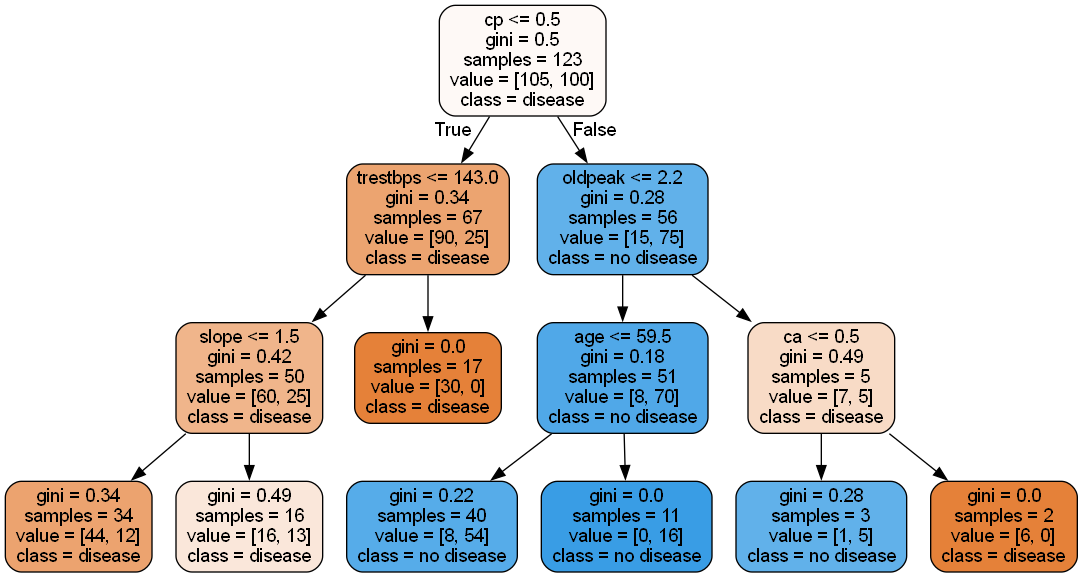

In [44]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [45]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

[[403  63  30]
 [  9  87   5]
 [  0   8  33]]


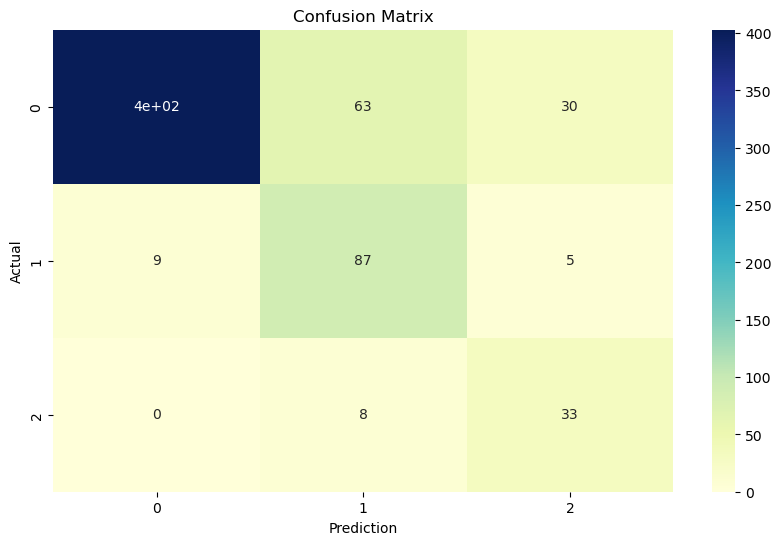

In [46]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

#heatmap matrix
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [47]:
#Check sensitivity and specificity of RTF
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9781553398058253
Specificity :  0.58


In [48]:
perm = PermutationImportance(model, random_state=1).fit(X_test_onlyscaled, y_test)
eli5.show_weights(perm, feature_names = X_test_onlyscaled.columns.tolist())

Weight,Feature
0.1034 ± 0.0195,accelerations
0.0129 ± 0.0078,prolongued_decelerations
0.0016 ± 0.0040,mean_value_of_long_term_variability
0.0006 ± 0.0015,light_decelerations
0 ± 0.0000,histogram_median
0 ± 0.0000,histogram_mean
0 ± 0.0000,histogram_mode
0 ± 0.0000,histogram_number_of_zeroes
0 ± 0.0000,histogram_number_of_peaks
0 ± 0.0000,histogram_max


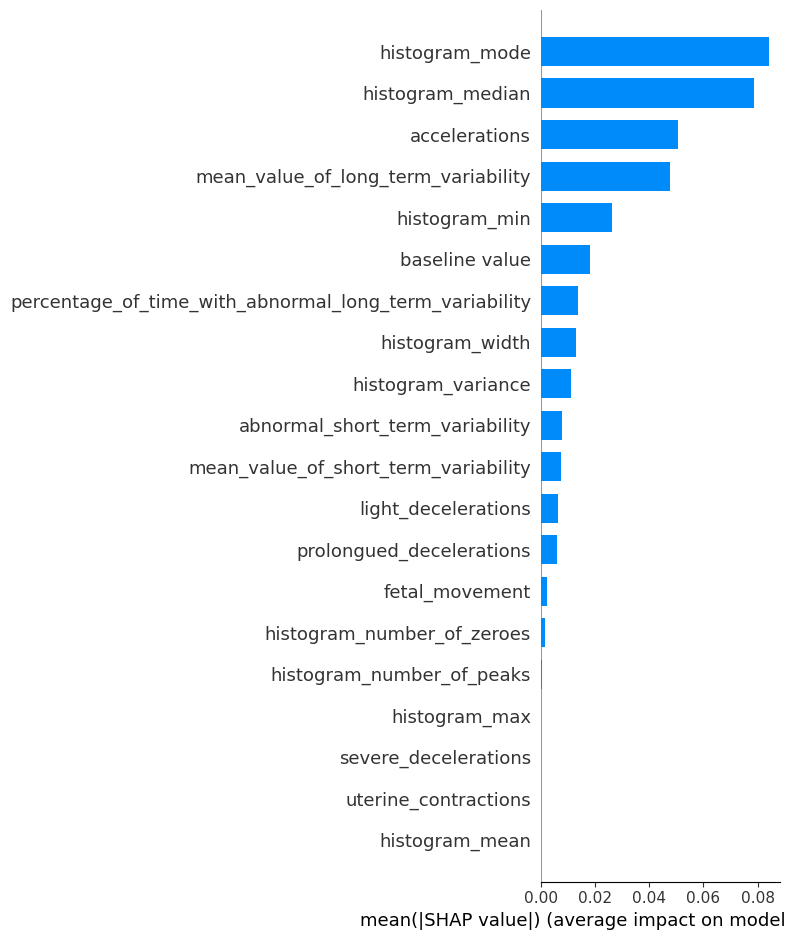

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_onlyscaled)

shap.summary_plot(shap_values[1], X_test_onlyscaled, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


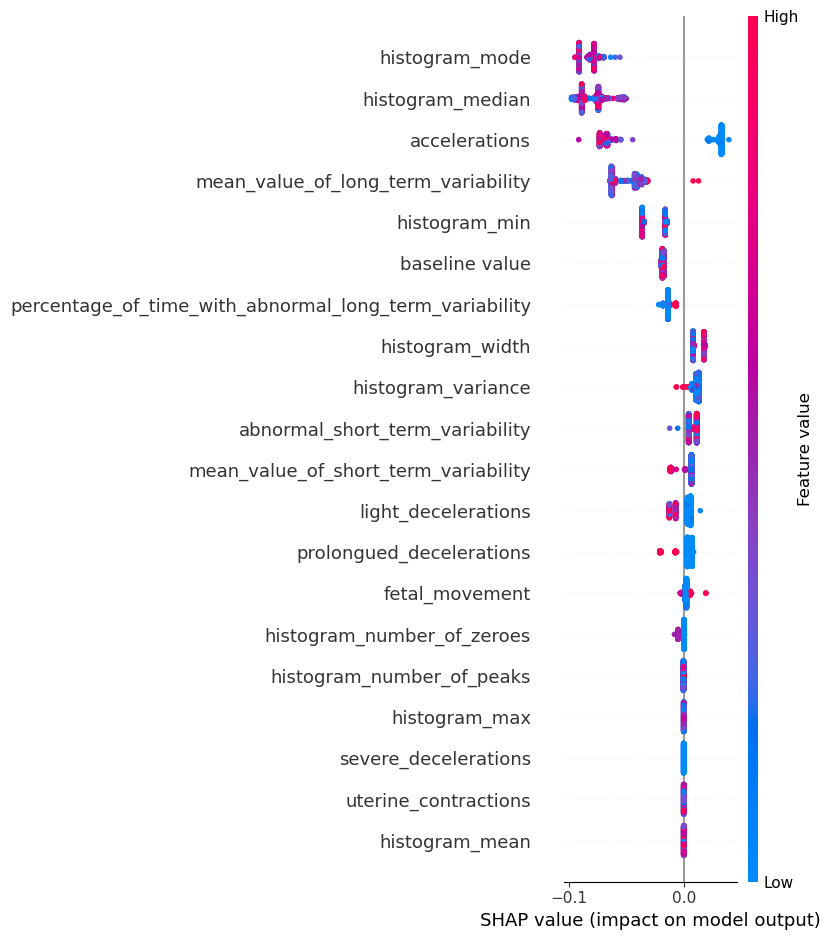

In [50]:
shap.summary_plot(shap_values[1], X_test_onlyscaled)

In [51]:
def fetal_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [52]:
data_for_prediction = X_test_onlyscaled.iloc[1,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [53]:
data_for_prediction = X_test_onlyscaled.iloc[25,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [54]:
data_for_prediction = X_test_onlyscaled.iloc[50,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [55]:
shap_values = explainer.shap_values(X_train_onlyscaled.iloc[:100])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_onlyscaled.iloc[:100])

In [56]:
#Save the models
import pickle

pickle.dump(lr_clf, open('../static/models/lr_fh_cl.pkl','wb'))
pickle.dump(knn_clf, open('../static/models/kn_fh_cl.pkl','wb'))
pickle.dump(svm_clf, open('../static/models/svm_fh_cl.pkl','wb'))
pickle.dump(tree_clf, open('../static/models/dt_fh_cl.pkl','wb'))
pickle.dump(rf_clf, open('../static/models/rf_fh_cl.pkl','wb'))